In [52]:
from IPython.display import display, HTML
display(HTML("""
<style>
div.container{width:86% !important;}
div.cell.code_cell.rendered{width:100%;}
div.CodeMirror {font-family:Consolas; font-size:15pt;}
div.output {font-size:15pt; font-weight:bold;}
div.input {font-family:Consolas; font-size:15pt;}
div.prompt {min-width:70px;}
div#toc-wrapper{padding-top:120px;}
div.text_cell_render ul li{font-size:12pt;padding:5px;}
table.dataframe{font-size:15px;}
</style>
"""))

# 1. 기존의 프로그램 방식

- 회귀분석(linear regression) 설명 사이트 : https://gbhat.com/machine_learning/linear_regression.html
- 오차함수 : MSE(오차제곱평균), RMSE(루트를 취하기 때문에 MSE의 단점이 어느정도 해소. 이상치에 덜 민감), MAE(mean absolute erro error ; 절대값평균)  
-
https://jysden.medium.com/%EC%96%B8%EC%A0%9C-mse-mae-rmse%EB%A5%BC-%EC%82%AC%EC%9A%A9%ED%95%98%EB%8A%94%EA%B0%80-c473bd831c62

![image](https://miro.medium.com/v2/resize:fit:720/format:webp/1*XRXgMqrr5rq-V1rW7SkrtA.png)

- 경사하강법 설명
    - https://www.mql5.com/ko/articles/11200
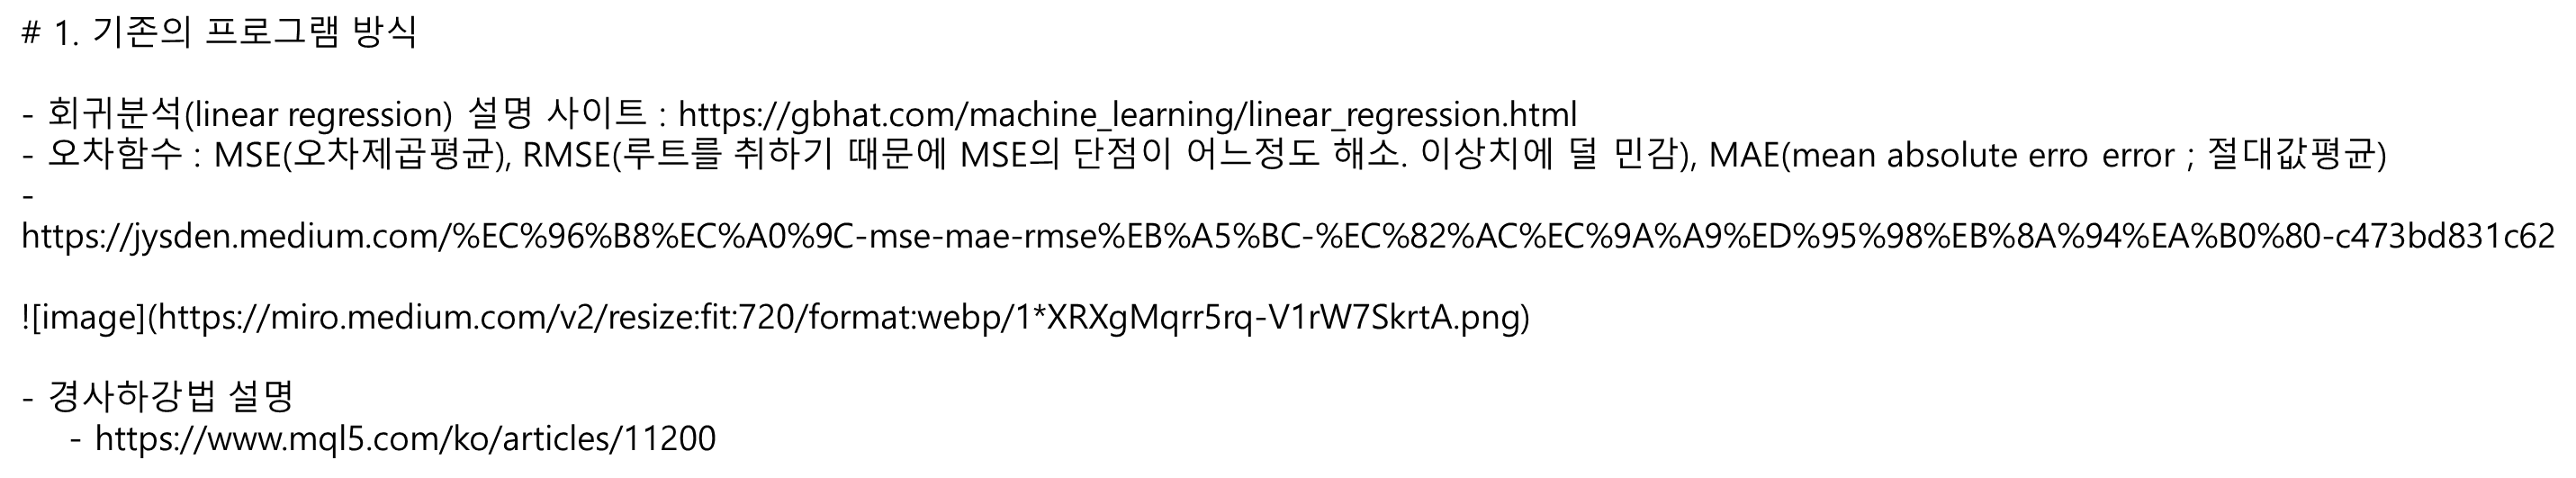

In [53]:
# 섭씨온도를 화씨온도를 출력
def celsius_to_faherenheit(c):
    return c * 1.8 + 32

In [54]:
input_c = int(input('섭씨온도 ?'))
print('화씨온도는', celsius_to_faherenheit(input_c))

섭씨온도 ?11
화씨온도는 51.8


# 2. 머신러닝 프로그램 방식
```
1. 데이터 확보 및 생성
2. 데이터 전처리 : 
    스케일 조정
    훈련데이터(학습데이터셋), 검증데이터셋, 시험데이터셋로 분할
3. 모델구성
4. 모델 학습과정 설정
5. 모델 학습시키기
6. 모델 평가(시험데이터셋으로)
7. 모델 저장 및 사용(입력값이 주어지면 예측값 받기)
```
## 2.1 노이즈가 없는 데이터로 실습

In [55]:
import numpy as np
import matplotlib.pyplot as plt

In [56]:
# 1. 데이터 생성
data_C = np.arange(100) # 0부터 99까지
data_C # 독립변수(입력변수)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

In [57]:
data_F = celsius_to_faherenheit(data_C)
data_F # 종속변수(타겟변수, 출력변수)

array([ 32. ,  33.8,  35.6,  37.4,  39.2,  41. ,  42.8,  44.6,  46.4,
        48.2,  50. ,  51.8,  53.6,  55.4,  57.2,  59. ,  60.8,  62.6,
        64.4,  66.2,  68. ,  69.8,  71.6,  73.4,  75.2,  77. ,  78.8,
        80.6,  82.4,  84.2,  86. ,  87.8,  89.6,  91.4,  93.2,  95. ,
        96.8,  98.6, 100.4, 102.2, 104. , 105.8, 107.6, 109.4, 111.2,
       113. , 114.8, 116.6, 118.4, 120.2, 122. , 123.8, 125.6, 127.4,
       129.2, 131. , 132.8, 134.6, 136.4, 138.2, 140. , 141.8, 143.6,
       145.4, 147.2, 149. , 150.8, 152.6, 154.4, 156.2, 158. , 159.8,
       161.6, 163.4, 165.2, 167. , 168.8, 170.6, 172.4, 174.2, 176. ,
       177.8, 179.6, 181.4, 183.2, 185. , 186.8, 188.6, 190.4, 192.2,
       194. , 195.8, 197.6, 199.4, 201.2, 203. , 204.8, 206.6, 208.4,
       210.2])

In [58]:
# 2. 데이터 전처리 : 컴퓨터에게 학습시키기 위해 스케일 조정
scaled_data_C = data_C / 100.0
scaled_data_F = data_F / 100.0
print('학습시 독립변수 :', scaled_data_C)
print('학습시 타겟변수 :', scaled_data_F)

학습시 독립변수 : [0.   0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.1  0.11 0.12 0.13
 0.14 0.15 0.16 0.17 0.18 0.19 0.2  0.21 0.22 0.23 0.24 0.25 0.26 0.27
 0.28 0.29 0.3  0.31 0.32 0.33 0.34 0.35 0.36 0.37 0.38 0.39 0.4  0.41
 0.42 0.43 0.44 0.45 0.46 0.47 0.48 0.49 0.5  0.51 0.52 0.53 0.54 0.55
 0.56 0.57 0.58 0.59 0.6  0.61 0.62 0.63 0.64 0.65 0.66 0.67 0.68 0.69
 0.7  0.71 0.72 0.73 0.74 0.75 0.76 0.77 0.78 0.79 0.8  0.81 0.82 0.83
 0.84 0.85 0.86 0.87 0.88 0.89 0.9  0.91 0.92 0.93 0.94 0.95 0.96 0.97
 0.98 0.99]
학습시 타겟변수 : [0.32  0.338 0.356 0.374 0.392 0.41  0.428 0.446 0.464 0.482 0.5   0.518
 0.536 0.554 0.572 0.59  0.608 0.626 0.644 0.662 0.68  0.698 0.716 0.734
 0.752 0.77  0.788 0.806 0.824 0.842 0.86  0.878 0.896 0.914 0.932 0.95
 0.968 0.986 1.004 1.022 1.04  1.058 1.076 1.094 1.112 1.13  1.148 1.166
 1.184 1.202 1.22  1.238 1.256 1.274 1.292 1.31  1.328 1.346 1.364 1.382
 1.4   1.418 1.436 1.454 1.472 1.49  1.508 1.526 1.544 1.562 1.58  1.598
 1.616 1.634 1.652 1.67  1.688 1

In [62]:
# import os
# os.environ["CUDA_VISIBLE_DEVICES"] = "-1"
import tensorflow as tf
print(tf.__version__)
tf.config.list_physical_devices('GPU')

2.10.0


[]

In [63]:
# 3. 모델 구성
from tensorflow.keras.models import Sequential # 모델생성
from tensorflow.keras.layers import Dense, Input # 입력값과 출력값으로 layer층 지정

model = Sequential()
# model.add(Input(shape=(1,) ))
# model.add(Dense(1))
model.add(Dense(units=1, # 타겟(종속) 변수의 갯수
                input_shape=(1,))) #입력(독립)변수의 shape

In [64]:
# 4. 모델 학습과정 설정
model.compile(loss="mse", # 손실함수 - 모델 학습 중 오차를 최소화하기 위해 사용
             optimizer="rmsprop", # 옵티마이저
             metrics=['mae']) #평가지표
# mse : 오차 제곱의 평균
# mae : 오차 절대값의 평균(이상치 영향이 감소)
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [65]:
# 학습전 예측
model.predict(np.array([[0],
                       [0.01]])) # 섭씨온도 0, 1도는 화씨온도 몇도?

1/1 [==============================] - 0s 39ms/step


array([[0.        ],
       [0.00450307]], dtype=float32)

In [66]:
# 학습전 모델 저장
model.save('model/before_learning.h5')

In [67]:
# 5. 모델 학습시키기 - 1번만 실행
hist = model.fit(scaled_data_C, # 입력변수(훈련데이터)
                scaled_data_F, # 타겟변수(훈련데이터)
                epochs=1000, # 학습횟수
                verbose=2) # 학습시 출력여부(0:학습내용출력X)

Epoch 1/1000
4/4 - 0s - loss: 1.1194 - mae: 0.9838 - 279ms/epoch - 70ms/step
Epoch 2/1000
4/4 - 0s - loss: 1.0955 - mae: 0.9727 - 7ms/epoch - 2ms/step
Epoch 3/1000
4/4 - 0s - loss: 1.0788 - mae: 0.9646 - 9ms/epoch - 2ms/step
Epoch 4/1000
4/4 - 0s - loss: 1.0634 - mae: 0.9572 - 9ms/epoch - 2ms/step
Epoch 5/1000
4/4 - 0s - loss: 1.0508 - mae: 0.9511 - 8ms/epoch - 2ms/step
Epoch 6/1000
4/4 - 0s - loss: 1.0379 - mae: 0.9447 - 7ms/epoch - 2ms/step
Epoch 7/1000
4/4 - 0s - loss: 1.0265 - mae: 0.9391 - 8ms/epoch - 2ms/step
Epoch 8/1000
4/4 - 0s - loss: 1.0139 - mae: 0.9329 - 7ms/epoch - 2ms/step
Epoch 9/1000
4/4 - 0s - loss: 1.0022 - mae: 0.9269 - 8ms/epoch - 2ms/step
Epoch 10/1000
4/4 - 0s - loss: 0.9908 - mae: 0.9213 - 9ms/epoch - 2ms/step
Epoch 11/1000
4/4 - 0s - loss: 0.9795 - mae: 0.9155 - 8ms/epoch - 2ms/step
Epoch 12/1000
4/4 - 0s - loss: 0.9677 - mae: 0.9096 - 8ms/epoch - 2ms/step
Epoch 13/1000
4/4 - 0s - loss: 0.9565 - mae: 0.9038 - 8ms/epoch - 2ms/step
Epoch 14/1000
4/4 - 0s - loss: 

4/4 - 0s - loss: 0.1914 - mae: 0.3610 - 5ms/epoch - 1ms/step
Epoch 111/1000
4/4 - 0s - loss: 0.1867 - mae: 0.3561 - 6ms/epoch - 1ms/step
Epoch 112/1000
4/4 - 0s - loss: 0.1828 - mae: 0.3521 - 6ms/epoch - 2ms/step
Epoch 113/1000
4/4 - 0s - loss: 0.1785 - mae: 0.3477 - 5ms/epoch - 1ms/step
Epoch 114/1000
4/4 - 0s - loss: 0.1745 - mae: 0.3434 - 5ms/epoch - 1ms/step
Epoch 115/1000
4/4 - 0s - loss: 0.1710 - mae: 0.3396 - 6ms/epoch - 1ms/step
Epoch 116/1000
4/4 - 0s - loss: 0.1667 - mae: 0.3350 - 6ms/epoch - 1ms/step
Epoch 117/1000
4/4 - 0s - loss: 0.1623 - mae: 0.3303 - 7ms/epoch - 2ms/step
Epoch 118/1000
4/4 - 0s - loss: 0.1583 - mae: 0.3260 - 5ms/epoch - 1ms/step
Epoch 119/1000
4/4 - 0s - loss: 0.1543 - mae: 0.3217 - 7ms/epoch - 2ms/step
Epoch 120/1000
4/4 - 0s - loss: 0.1500 - mae: 0.3170 - 6ms/epoch - 1ms/step
Epoch 121/1000
4/4 - 0s - loss: 0.1461 - mae: 0.3126 - 6ms/epoch - 2ms/step
Epoch 122/1000
4/4 - 0s - loss: 0.1419 - mae: 0.3080 - 5ms/epoch - 1ms/step
Epoch 123/1000
4/4 - 0s - l

Epoch 218/1000
4/4 - 0s - loss: 0.0253 - mae: 0.1374 - 6ms/epoch - 2ms/step
Epoch 219/1000
4/4 - 0s - loss: 0.0250 - mae: 0.1367 - 5ms/epoch - 1ms/step
Epoch 220/1000
4/4 - 0s - loss: 0.0247 - mae: 0.1358 - 12ms/epoch - 3ms/step
Epoch 221/1000
4/4 - 0s - loss: 0.0244 - mae: 0.1349 - 7ms/epoch - 2ms/step
Epoch 222/1000
4/4 - 0s - loss: 0.0240 - mae: 0.1339 - 7ms/epoch - 2ms/step
Epoch 223/1000
4/4 - 0s - loss: 0.0237 - mae: 0.1330 - 6ms/epoch - 1ms/step
Epoch 224/1000
4/4 - 0s - loss: 0.0234 - mae: 0.1321 - 6ms/epoch - 1ms/step
Epoch 225/1000
4/4 - 0s - loss: 0.0231 - mae: 0.1313 - 6ms/epoch - 2ms/step
Epoch 226/1000
4/4 - 0s - loss: 0.0228 - mae: 0.1304 - 7ms/epoch - 2ms/step
Epoch 227/1000
4/4 - 0s - loss: 0.0225 - mae: 0.1295 - 6ms/epoch - 1ms/step
Epoch 228/1000
4/4 - 0s - loss: 0.0222 - mae: 0.1287 - 6ms/epoch - 2ms/step
Epoch 229/1000
4/4 - 0s - loss: 0.0220 - mae: 0.1279 - 6ms/epoch - 1ms/step
Epoch 230/1000
4/4 - 0s - loss: 0.0217 - mae: 0.1272 - 6ms/epoch - 2ms/step
Epoch 231/1

Epoch 326/1000
4/4 - 0s - loss: 0.0034 - mae: 0.0504 - 7ms/epoch - 2ms/step
Epoch 327/1000
4/4 - 0s - loss: 0.0033 - mae: 0.0496 - 5ms/epoch - 1ms/step
Epoch 328/1000
4/4 - 0s - loss: 0.0032 - mae: 0.0487 - 6ms/epoch - 2ms/step
Epoch 329/1000
4/4 - 0s - loss: 0.0031 - mae: 0.0481 - 5ms/epoch - 1ms/step
Epoch 330/1000
4/4 - 0s - loss: 0.0030 - mae: 0.0474 - 6ms/epoch - 1ms/step
Epoch 331/1000
4/4 - 0s - loss: 0.0029 - mae: 0.0465 - 5ms/epoch - 1ms/step
Epoch 332/1000
4/4 - 0s - loss: 0.0028 - mae: 0.0456 - 6ms/epoch - 1ms/step
Epoch 333/1000
4/4 - 0s - loss: 0.0027 - mae: 0.0447 - 6ms/epoch - 1ms/step
Epoch 334/1000
4/4 - 0s - loss: 0.0026 - mae: 0.0439 - 5ms/epoch - 1ms/step
Epoch 335/1000
4/4 - 0s - loss: 0.0025 - mae: 0.0430 - 6ms/epoch - 1ms/step
Epoch 336/1000
4/4 - 0s - loss: 0.0024 - mae: 0.0421 - 5ms/epoch - 1ms/step
Epoch 337/1000
4/4 - 0s - loss: 0.0023 - mae: 0.0414 - 5ms/epoch - 1ms/step
Epoch 338/1000
4/4 - 0s - loss: 0.0022 - mae: 0.0405 - 6ms/epoch - 1ms/step
Epoch 339/10

Epoch 429/1000
4/4 - 0s - loss: 8.0851e-07 - mae: 8.4005e-04 - 5ms/epoch - 1ms/step
Epoch 430/1000
4/4 - 0s - loss: 6.5166e-07 - mae: 7.8138e-04 - 6ms/epoch - 1ms/step
Epoch 431/1000
4/4 - 0s - loss: 8.2185e-08 - mae: 2.7897e-04 - 6ms/epoch - 1ms/step
Epoch 432/1000
4/4 - 0s - loss: 3.3691e-07 - mae: 5.4656e-04 - 6ms/epoch - 1ms/step
Epoch 433/1000
4/4 - 0s - loss: 1.7786e-06 - mae: 0.0012 - 7ms/epoch - 2ms/step
Epoch 434/1000
4/4 - 0s - loss: 4.0907e-08 - mae: 1.9261e-04 - 8ms/epoch - 2ms/step
Epoch 435/1000
4/4 - 0s - loss: 2.4868e-08 - mae: 1.4933e-04 - 7ms/epoch - 2ms/step
Epoch 436/1000
4/4 - 0s - loss: 7.6476e-07 - mae: 8.1275e-04 - 5ms/epoch - 1ms/step
Epoch 437/1000
4/4 - 0s - loss: 4.6841e-07 - mae: 6.6894e-04 - 7ms/epoch - 2ms/step
Epoch 438/1000
4/4 - 0s - loss: 5.3947e-07 - mae: 7.1716e-04 - 5ms/epoch - 1ms/step
Epoch 439/1000
4/4 - 0s - loss: 8.7015e-07 - mae: 9.0925e-04 - 8ms/epoch - 2ms/step
Epoch 440/1000
4/4 - 0s - loss: 5.5754e-08 - mae: 2.1279e-04 - 9ms/epoch - 2ms/s

Epoch 528/1000
4/4 - 0s - loss: 3.1315e-07 - mae: 5.4742e-04 - 6ms/epoch - 1ms/step
Epoch 529/1000
4/4 - 0s - loss: 8.3732e-07 - mae: 9.0040e-04 - 6ms/epoch - 1ms/step
Epoch 530/1000
4/4 - 0s - loss: 6.5929e-07 - mae: 7.9336e-04 - 5ms/epoch - 1ms/step
Epoch 531/1000
4/4 - 0s - loss: 1.5501e-07 - mae: 3.8491e-04 - 5ms/epoch - 1ms/step
Epoch 532/1000
4/4 - 0s - loss: 7.0060e-07 - mae: 8.0961e-04 - 5ms/epoch - 1ms/step
Epoch 533/1000
4/4 - 0s - loss: 1.1074e-06 - mae: 9.9619e-04 - 6ms/epoch - 1ms/step
Epoch 534/1000
4/4 - 0s - loss: 2.1758e-07 - mae: 4.4805e-04 - 5ms/epoch - 1ms/step
Epoch 535/1000
4/4 - 0s - loss: 2.8610e-07 - mae: 5.1923e-04 - 6ms/epoch - 1ms/step
Epoch 536/1000
4/4 - 0s - loss: 8.4224e-07 - mae: 8.9649e-04 - 5ms/epoch - 1ms/step
Epoch 537/1000
4/4 - 0s - loss: 6.7889e-07 - mae: 8.0109e-04 - 6ms/epoch - 1ms/step
Epoch 538/1000
4/4 - 0s - loss: 4.4470e-07 - mae: 6.5533e-04 - 5ms/epoch - 1ms/step
Epoch 539/1000
4/4 - 0s - loss: 4.6994e-07 - mae: 6.7182e-04 - 6ms/epoch - 1

4/4 - 0s - loss: 1.3232e-06 - mae: 0.0011 - 5ms/epoch - 1ms/step
Epoch 627/1000
4/4 - 0s - loss: 1.1833e-07 - mae: 3.3302e-04 - 7ms/epoch - 2ms/step
Epoch 628/1000
4/4 - 0s - loss: 1.2971e-07 - mae: 3.4405e-04 - 6ms/epoch - 1ms/step
Epoch 629/1000
4/4 - 0s - loss: 1.1665e-06 - mae: 0.0010 - 6ms/epoch - 1ms/step
Epoch 630/1000
4/4 - 0s - loss: 4.8116e-07 - mae: 6.7532e-04 - 6ms/epoch - 1ms/step
Epoch 631/1000
4/4 - 0s - loss: 6.7115e-07 - mae: 7.9945e-04 - 6ms/epoch - 1ms/step
Epoch 632/1000
4/4 - 0s - loss: 1.6402e-07 - mae: 3.9649e-04 - 5ms/epoch - 1ms/step
Epoch 633/1000
4/4 - 0s - loss: 9.0195e-07 - mae: 9.2619e-04 - 6ms/epoch - 1ms/step
Epoch 634/1000
4/4 - 0s - loss: 4.1883e-07 - mae: 6.3575e-04 - 5ms/epoch - 1ms/step
Epoch 635/1000
4/4 - 0s - loss: 9.7724e-07 - mae: 9.5361e-04 - 6ms/epoch - 1ms/step
Epoch 636/1000
4/4 - 0s - loss: 2.8512e-07 - mae: 5.1543e-04 - 6ms/epoch - 1ms/step
Epoch 637/1000
4/4 - 0s - loss: 5.4081e-07 - mae: 7.1711e-04 - 7ms/epoch - 2ms/step
Epoch 638/1000


Epoch 725/1000
4/4 - 0s - loss: 1.0987e-06 - mae: 0.0010 - 6ms/epoch - 1ms/step
Epoch 726/1000
4/4 - 0s - loss: 1.5952e-07 - mae: 3.9149e-04 - 5ms/epoch - 1ms/step
Epoch 727/1000
4/4 - 0s - loss: 1.4953e-07 - mae: 3.7023e-04 - 7ms/epoch - 2ms/step
Epoch 728/1000
4/4 - 0s - loss: 9.7703e-07 - mae: 9.5059e-04 - 6ms/epoch - 1ms/step
Epoch 729/1000
4/4 - 0s - loss: 7.8738e-07 - mae: 8.4865e-04 - 6ms/epoch - 1ms/step
Epoch 730/1000
4/4 - 0s - loss: 3.2502e-07 - mae: 5.5918e-04 - 5ms/epoch - 1ms/step
Epoch 731/1000
4/4 - 0s - loss: 5.4596e-07 - mae: 7.2468e-04 - 7ms/epoch - 2ms/step
Epoch 732/1000
4/4 - 0s - loss: 8.7072e-07 - mae: 9.0912e-04 - 6ms/epoch - 1ms/step
Epoch 733/1000
4/4 - 0s - loss: 4.1053e-07 - mae: 6.0997e-04 - 6ms/epoch - 1ms/step
Epoch 734/1000
4/4 - 0s - loss: 3.8077e-07 - mae: 6.0293e-04 - 6ms/epoch - 1ms/step
Epoch 735/1000
4/4 - 0s - loss: 1.0042e-06 - mae: 9.7590e-04 - 7ms/epoch - 2ms/step
Epoch 736/1000
4/4 - 0s - loss: 2.1431e-07 - mae: 4.5458e-04 - 5ms/epoch - 1ms/s

Epoch 823/1000
4/4 - 0s - loss: 1.7424e-07 - mae: 4.0704e-04 - 8ms/epoch - 2ms/step
Epoch 824/1000
4/4 - 0s - loss: 7.5088e-07 - mae: 8.3437e-04 - 6ms/epoch - 2ms/step
Epoch 825/1000
4/4 - 0s - loss: 5.8514e-07 - mae: 7.4095e-04 - 8ms/epoch - 2ms/step
Epoch 826/1000
4/4 - 0s - loss: 9.0459e-07 - mae: 9.1470e-04 - 5ms/epoch - 1ms/step
Epoch 827/1000
4/4 - 0s - loss: 2.0955e-07 - mae: 4.4606e-04 - 7ms/epoch - 2ms/step
Epoch 828/1000
4/4 - 0s - loss: 2.8095e-07 - mae: 5.0253e-04 - 6ms/epoch - 1ms/step
Epoch 829/1000
4/4 - 0s - loss: 1.2198e-06 - mae: 0.0011 - 7ms/epoch - 2ms/step
Epoch 830/1000
4/4 - 0s - loss: 5.4778e-07 - mae: 7.1325e-04 - 5ms/epoch - 1ms/step
Epoch 831/1000
4/4 - 0s - loss: 9.4146e-08 - mae: 3.0105e-04 - 6ms/epoch - 2ms/step
Epoch 832/1000
4/4 - 0s - loss: 4.4116e-07 - mae: 6.2420e-04 - 5ms/epoch - 1ms/step
Epoch 833/1000
4/4 - 0s - loss: 1.2114e-06 - mae: 0.0011 - 6ms/epoch - 1ms/step
Epoch 834/1000
4/4 - 0s - loss: 2.5220e-07 - mae: 4.7786e-04 - 5ms/epoch - 1ms/step


4/4 - 0s - loss: 2.6858e-07 - mae: 5.0826e-04 - 7ms/epoch - 2ms/step
Epoch 922/1000
4/4 - 0s - loss: 5.1011e-07 - mae: 7.0132e-04 - 7ms/epoch - 2ms/step
Epoch 923/1000
4/4 - 0s - loss: 8.3935e-07 - mae: 9.0058e-04 - 8ms/epoch - 2ms/step
Epoch 924/1000
4/4 - 0s - loss: 7.0230e-07 - mae: 8.0594e-04 - 6ms/epoch - 1ms/step
Epoch 925/1000
4/4 - 0s - loss: 1.8574e-07 - mae: 4.2392e-04 - 7ms/epoch - 2ms/step
Epoch 926/1000
4/4 - 0s - loss: 7.9405e-07 - mae: 8.7440e-04 - 5ms/epoch - 1ms/step
Epoch 927/1000
4/4 - 0s - loss: 8.4929e-07 - mae: 8.9323e-04 - 6ms/epoch - 1ms/step
Epoch 928/1000
4/4 - 0s - loss: 9.9846e-08 - mae: 3.0837e-04 - 7ms/epoch - 2ms/step
Epoch 929/1000
4/4 - 0s - loss: 6.8153e-07 - mae: 7.9844e-04 - 6ms/epoch - 1ms/step
Epoch 930/1000
4/4 - 0s - loss: 4.1072e-07 - mae: 6.2488e-04 - 6ms/epoch - 1ms/step
Epoch 931/1000
4/4 - 0s - loss: 3.2286e-07 - mae: 5.5268e-04 - 6ms/epoch - 1ms/step
Epoch 932/1000
4/4 - 0s - loss: 1.0008e-06 - mae: 9.6493e-04 - 6ms/epoch - 1ms/step
Epoch 9

In [68]:
# 6. 모델 평가(그래프를 통해 loss와 metrics값의 추이, 평가함수)
print(hist.history.keys())
print(hist.history['loss'][:5])
print(hist.history['mae'][:5])

dict_keys(['loss', 'mae'])
[1.1194390058517456, 1.0955147743225098, 1.0788151025772095, 1.0633875131607056, 1.050776720046997]
[0.9837599992752075, 0.9726734161376953, 0.9645920395851135, 0.9571663737297058, 0.9510557055473328]


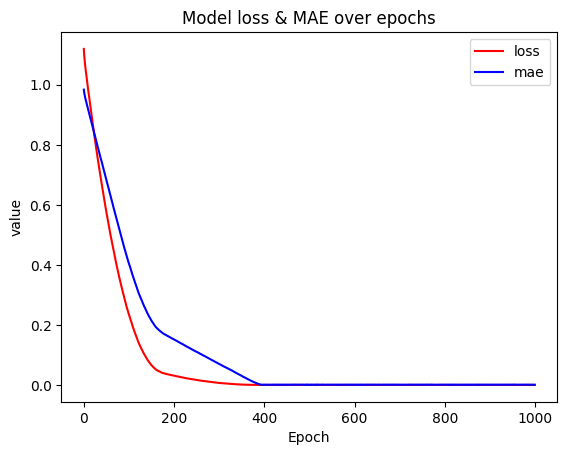

In [69]:
plt.plot(hist.history['loss'], 'r', label='loss')
plt.plot(hist.history['mae'], 'b', label='mae')
plt.legend() # 범례 label 추가
plt.xlabel('Epoch')
plt.ylabel('value')
plt.title('Model loss & MAE over epochs')
plt.show()

In [70]:
# 7. 모델 저장 및 사용
# 학습 후 예측
model.predict(np.array([[0],
                       [0.01]])) # 섭씨온도 0, 1도는 화씨온도 몇도?

1/1 [==============================] - 0s 21ms/step


array([[0.31959254],
       [0.33758768]], dtype=float32)

In [71]:
model.save('model/after_learning.h5')

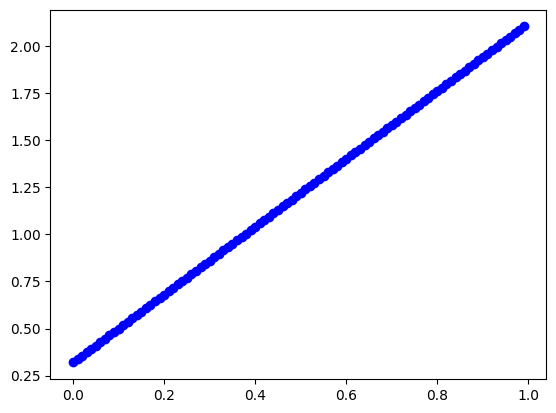

In [72]:
# 실제값
plt.scatter(x=scaled_data_C,
           y=scaled_data_F,
           c='b')
plt.show()

In [73]:
# 예측값
y_hat = model.predict([scaled_data_C])
for h, y in zip(y_hat, scaled_data_F):
    print('예측값:{}, 실제값:{}, 오차:{}'.format(h,
                                      y,
                                      h[0]-y))

4/4 [==============================] - 0s 2ms/step
예측값:[0.31959254], 실제값:0.32, 오차:-0.00040746450424195
예측값:[0.33758768], 실제값:0.33799999999999997, 오차:-0.00041231560707089
예측값:[0.35558283], 실제값:0.35600000000000004, 오차:-0.000417166709899941
예측값:[0.37357795], 실제값:0.374, 오차:-0.00042204761505126864
예측값:[0.3915731], 실제값:0.392, 오차:-0.0004268987178802641
예측값:[0.40956825], 실제값:0.41, 오차:-0.0004317498207092041
예측값:[0.42756337], 실제값:0.428, 오차:-0.00043663072586058727
예측값:[0.44555855], 실제값:0.446, 오차:-0.00044145202636719505
예측값:[0.46355367], 실제값:0.46399999999999997, 오차:-0.0004463329315185227
예측값:[0.48154882], 실제값:0.48200000000000004, 오차:-0.0004511840343475737
예측값:[0.49954396], 실제값:0.5, 오차:-0.00045603513717651367
예측값:[0.5175391], 실제값:0.518, 오차:-0.00046091604232789685
예측값:[0.53553426], 실제값:0.536, 오차:-0.00046573734283450463
예측값:[0.5535294], 실제값:0.554, 오차:-0.0004706182479858878
예측값:[0.5715245], 실제값:0.5720000000000001, 오차:-0.000475499153137271
예측값:[0.5895197], 실제값:0.59, 오차:-0.00048032045364376774
예측값:[0.60

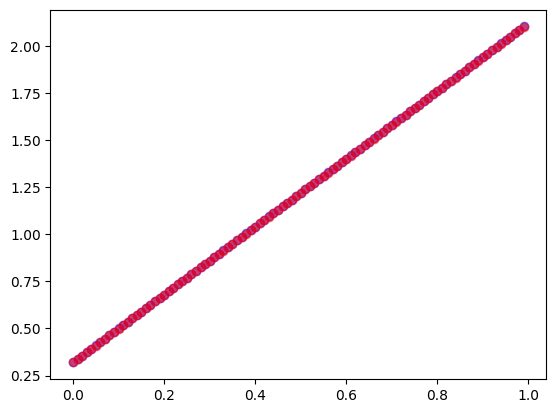

In [75]:
plt.scatter(x=scaled_data_C, y=scaled_data_F, c='b', alpha=0.5) # 투명한 점그래프
plt.scatter(x=scaled_data_C, y=y_hat, c='r', alpha=0.5)

## 2.2 노이즈가 있는 데이터로 실습

In [81]:
np.random.seed(7)
noise = np.random.normal(0, scale=0.1, size=100) # 평균0, 표준편차 0.1개 100개 데이터
noised_scaled_data_F = scaled_data_F + noise

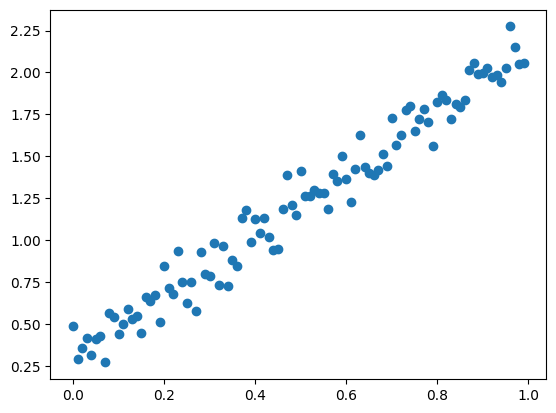

In [82]:
plt.scatter(x=scaled_data_C, y=noised_scaled_data_F)
plt.show()

In [83]:
# 3. 모델구성
model2 = Sequential()
model2.add(Dense(1, input_shape=(1,)))
# 4. 학습과정 설정
model2.compile(loss='mse', optimizer='rmsprop', metrics=['mae'])
model2.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [84]:
# 5. 모델 학습
hist2 = model2.fit(scaled_data_C, noised_scaled_data_F, epochs=1000, verbose=1)

Epoch 1/1000
4/4 [==============================] - 0s 2ms/step - loss: 2.3532 - mae: 1.3918
Epoch 2/1000
4/4 [==============================] - 0s 2ms/step - loss: 2.3183 - mae: 1.3802
Epoch 3/1000
4/4 [==============================] - 0s 3ms/step - loss: 2.2947 - mae: 1.3724
Epoch 4/1000
4/4 [==============================] - 0s 2ms/step - loss: 2.2732 - mae: 1.3652
Epoch 5/1000
4/4 [==============================] - 0s 2ms/step - loss: 2.2550 - mae: 1.3590
Epoch 6/1000
4/4 [==============================] - 0s 2ms/step - loss: 2.2369 - mae: 1.3529
Epoch 7/1000
4/4 [==============================] - 0s 2ms/step - loss: 2.2181 - mae: 1.3466
Epoch 8/1000
4/4 [==============================] - 0s 3ms/step - loss: 2.2005 - mae: 1.3404
Epoch 9/1000
4/4 [==============================] - 0s 2ms/step - loss: 2.1833 - mae: 1.3346
Epoch 10/1000
4/4 [==============================] - 0s 2ms/step - loss: 2.1649 - mae: 1.3283
Epoch 11/1000
4/4 [==============================] - 0s 2ms/step - lo

4/4 [==============================] - 0s 2ms/step - loss: 1.0712 - mae: 0.8811
Epoch 89/1000
4/4 [==============================] - 0s 2ms/step - loss: 1.0590 - mae: 0.8751
Epoch 90/1000
4/4 [==============================] - 0s 2ms/step - loss: 1.0480 - mae: 0.8699
Epoch 91/1000
4/4 [==============================] - 0s 2ms/step - loss: 1.0372 - mae: 0.8645
Epoch 92/1000
4/4 [==============================] - 0s 2ms/step - loss: 1.0257 - mae: 0.8587
Epoch 93/1000
4/4 [==============================] - 0s 2ms/step - loss: 1.0155 - mae: 0.8537
Epoch 94/1000
4/4 [==============================] - 0s 2ms/step - loss: 1.0036 - mae: 0.8477
Epoch 95/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.9940 - mae: 0.8429
Epoch 96/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.9846 - mae: 0.8382
Epoch 97/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.9744 - mae: 0.8331
Epoch 98/1000
4/4 [==============================] - 0s 2ms/step - loss: 0

4/4 [==============================] - 0s 2ms/step - loss: 0.3577 - mae: 0.4874
Epoch 175/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.3532 - mae: 0.4846
Epoch 176/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.3488 - mae: 0.4821
Epoch 177/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.3439 - mae: 0.4790
Epoch 178/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.3397 - mae: 0.4762
Epoch 179/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.3338 - mae: 0.4727
Epoch 180/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.3285 - mae: 0.4693
Epoch 181/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.3230 - mae: 0.4659
Epoch 182/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.3182 - mae: 0.4628
Epoch 183/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.3144 - mae: 0.4603
Epoch 184/1000
4/4 [==============================] - 0s 2ms/step

4/4 [==============================] - 0s 2ms/step - loss: 0.1366 - mae: 0.3166
Epoch 261/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.1358 - mae: 0.3156
Epoch 262/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.1351 - mae: 0.3145
Epoch 263/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.1343 - mae: 0.3136
Epoch 264/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.1338 - mae: 0.3130
Epoch 265/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.1330 - mae: 0.3120
Epoch 266/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.1321 - mae: 0.3108
Epoch 267/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.1315 - mae: 0.3101
Epoch 268/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.1310 - mae: 0.3094
Epoch 269/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.1302 - mae: 0.3085
Epoch 270/1000
4/4 [==============================] - 0s 2ms/step

4/4 [==============================] - 0s 2ms/step - loss: 0.0850 - mae: 0.2458
Epoch 347/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0846 - mae: 0.2453
Epoch 348/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0841 - mae: 0.2445
Epoch 349/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0836 - mae: 0.2439
Epoch 350/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0831 - mae: 0.2432
Epoch 351/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0825 - mae: 0.2422
Epoch 352/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0820 - mae: 0.2413
Epoch 353/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0814 - mae: 0.2404
Epoch 354/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0809 - mae: 0.2396
Epoch 355/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0805 - mae: 0.2389
Epoch 356/1000
4/4 [==============================] - 0s 2ms/step

4/4 [==============================] - 0s 2ms/step - loss: 0.0489 - mae: 0.1847
Epoch 433/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0486 - mae: 0.1841
Epoch 434/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0483 - mae: 0.1835
Epoch 435/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0479 - mae: 0.1828
Epoch 436/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0475 - mae: 0.1821
Epoch 437/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0471 - mae: 0.1813
Epoch 438/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0468 - mae: 0.1805
Epoch 439/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0464 - mae: 0.1798
Epoch 440/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0460 - mae: 0.1791
Epoch 441/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0457 - mae: 0.1784
Epoch 442/1000
4/4 [==============================] - 0s 2ms/step

4/4 [==============================] - 0s 2ms/step - loss: 0.0259 - mae: 0.1332
Epoch 519/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0257 - mae: 0.1324
Epoch 520/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0255 - mae: 0.1319
Epoch 521/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0253 - mae: 0.1312
Epoch 522/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0251 - mae: 0.1305
Epoch 523/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0249 - mae: 0.1301
Epoch 524/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0247 - mae: 0.1295
Epoch 525/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0245 - mae: 0.1289
Epoch 526/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0244 - mae: 0.1285
Epoch 527/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0242 - mae: 0.1279
Epoch 528/1000
4/4 [==============================] - 0s 2ms/step

4/4 [==============================] - 0s 2ms/step - loss: 0.0137 - mae: 0.0937
Epoch 605/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0137 - mae: 0.0935
Epoch 606/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.0136 - mae: 0.0932
Epoch 607/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0136 - mae: 0.0930
Epoch 608/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0135 - mae: 0.0927
Epoch 609/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0134 - mae: 0.0926
Epoch 610/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0134 - mae: 0.0923
Epoch 611/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0133 - mae: 0.0920
Epoch 612/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0133 - mae: 0.0918
Epoch 613/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0132 - mae: 0.0915
Epoch 614/1000
4/4 [==============================] - 0s 2ms/step

4/4 [==============================] - 0s 2ms/step - loss: 0.0107 - mae: 0.0813
Epoch 691/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0107 - mae: 0.0812
Epoch 692/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0107 - mae: 0.0814
Epoch 693/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0106 - mae: 0.0810
Epoch 694/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0106 - mae: 0.0811
Epoch 695/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0106 - mae: 0.0811
Epoch 696/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0106 - mae: 0.0810
Epoch 697/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0106 - mae: 0.0813
Epoch 698/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0106 - mae: 0.0812
Epoch 699/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0106 - mae: 0.0809
Epoch 700/1000
4/4 [==============================] - 0s 2ms/step

4/4 [==============================] - 0s 2ms/step - loss: 0.0103 - mae: 0.0803
Epoch 777/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0103 - mae: 0.0803
Epoch 778/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0103 - mae: 0.0804
Epoch 779/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0103 - mae: 0.0803
Epoch 780/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0103 - mae: 0.0804
Epoch 781/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0103 - mae: 0.0802
Epoch 782/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0103 - mae: 0.0804
Epoch 783/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0103 - mae: 0.0805
Epoch 784/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0103 - mae: 0.0805
Epoch 785/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0103 - mae: 0.0805
Epoch 786/1000
4/4 [==============================] - 0s 2ms/step

4/4 [==============================] - 0s 2ms/step - loss: 0.0103 - mae: 0.0806
Epoch 863/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0103 - mae: 0.0804
Epoch 864/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0103 - mae: 0.0803
Epoch 865/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.0103 - mae: 0.0802
Epoch 866/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0103 - mae: 0.0806
Epoch 867/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0103 - mae: 0.0807
Epoch 868/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0103 - mae: 0.0807
Epoch 869/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0103 - mae: 0.0807
Epoch 870/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0103 - mae: 0.0807
Epoch 871/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0103 - mae: 0.0807
Epoch 872/1000
4/4 [==============================] - 0s 2ms/step

4/4 [==============================] - 0s 1ms/step - loss: 0.0103 - mae: 0.0804
Epoch 949/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0103 - mae: 0.0803
Epoch 950/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0103 - mae: 0.0804
Epoch 951/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0103 - mae: 0.0804
Epoch 952/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0103 - mae: 0.0803
Epoch 953/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0103 - mae: 0.0805
Epoch 954/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.0103 - mae: 0.0806
Epoch 955/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0103 - mae: 0.0805
Epoch 956/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0103 - mae: 0.0806
Epoch 957/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0103 - mae: 0.0808
Epoch 958/1000
4/4 [==============================] - 0s 2ms/step

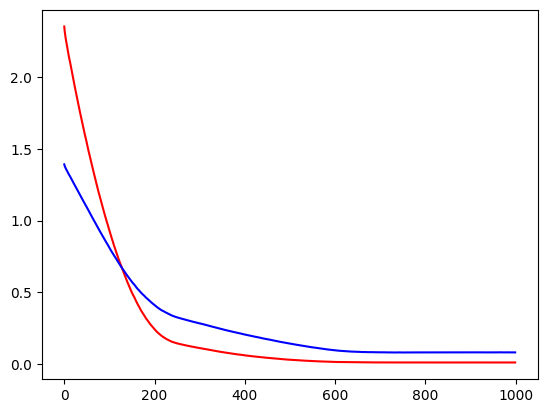

In [90]:
# 6. 학습된 모델 과정 살펴보기
plt.plot(hist2.history['loss'], c='r')
plt.plot(hist2.history['mae'], c='b')

In [91]:
model2.save('model/noise_after_learning.h5')

In [92]:
# 예측값
y_hat = model2.predict([scaled_data_C])

4/4 [==============================] - 0s 2ms/step


In [93]:
for h,y in zip(y_hat, noised_scaled_data_F) :
    print('실제값:{}, 예측값:{}, 오차:{}'.format(y,
                                        h,
                                        h[0]-y))

실제값:0.48905257038003563, 예측값:[0.30367804], 오차:-0.18537453464395165
실제값:0.2914062629459167, 예측값:[0.32206148], 오차:0.030655216145727582
실제값:0.3592820163678585, 예측값:[0.34044492], 오차:-0.018837093920653913
실제값:0.4147516282996508, 예측값:[0.3588284], 오차:-0.05592323269456351
실제값:0.31310769713742614, 예측값:[0.37721184], 오차:0.06410414182322144
실제값:0.4102065572905948, 예측값:[0.3955953], 오차:-0.014611245172064524
실제값:0.42791096141420687, 예측값:[0.41397876], 오차:-0.013932205940116293
실제값:0.2705275693654579, 예측값:[0.4323622], 오차:0.16183462946419297
실제값:0.5657658005663493, 예측값:[0.45074564], 오차:-0.1150201583811381
실제값:0.542049851591955, 예측값:[0.4691291], 오차:-0.07292076605118347
실제값:0.43745710260332404, 예측값:[0.48751256], 오차:0.05005545609533013
실제값:0.5008451738804279, 예측값:[0.505896], 오차:0.00505079837146416
실제값:0.5865299374196752, 예측값:[0.5242795], 오차:-0.06225046220757802
실제값:0.5278643584808353, 예측값:[0.5426629], 오차:0.014798560086822121
실제값:0.5477250921327455, 예측값:[0.56104636], 오차:0.013321269790472323
실제값:0.44467585875

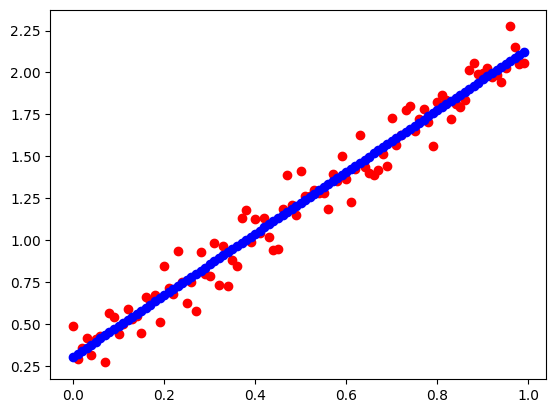

In [94]:
plt.scatter(x=scaled_data_C,
           y=noised_scaled_data_F,
           c='r')
plt.scatter(x=scaled_data_C,
           y=y_hat,
           c='b')